In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.model_selection import train_test_split
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
import json

In [2]:
from sklearn.decomposition import TruncatedSVD

In [3]:
train = pd.read_csv("train_set.csv")
train

,url,result
0,http://player.polyv.net/videos/3ee850a192d81e2...,2
1,http://www.hmaca.com/winnipeg-accounting-blog,1
2,http://www.generalcustom.com.br/index.php?opti...,1
3,http://bigcinema.tv/tag/%D0%94%D0%B8%D1%80%D0%...,0
4,http://www.hafenrocker.de/news/119-news-210920...,1
...,...,...
132287,http://masterstrans.com/component/contact/1,1
132288,http://www.tvmiros.gr/parousiasi-tou-sxediou-m...,1
132289,https://twitter.com/home?status=%E3%83%8C%E3%8...,0
132290,http://schertzauto.com/wp-content/themes/NAPA%...,2


In [4]:
valid = pd.read_csv("valid_set.csv")
valid

,url,result
0,http://jmrsl.net/index.php?option=com_jevents&...,1
1,http://www.ekwdesign.de/referenzen/corporate-d...,1
2,http://img25.artxun.com/sdd/oldimg/5dfd/5dfd94...,2
3,http://yourdayyourbudget.com/index.php?option=...,1
4,http://www.modconsolas.com/portal/index.php?li...,1
...,...,...
16532,http://bisaneema.org/%e0%a4%87%e0%a4%a4%e0%a4%...,2
16533,http://drogheriapreti.com/chi-siamo.html,1
16534,http://otomoto.pl/oferta/renault-trafic-zareje...,0
16535,http://www.bishopstrings.com/violins/ยฃ5000-ยฃ...,1


In [5]:
test = pd.read_csv("test_set.csv")
test

,url,result
0,http://www.jin0044.com/cl/?module=System&metho...,2
1,http://bjgdhm.com/show_products.asp?id=433,1
2,http://www.masseny.de/index.php?option=com_pho...,1
3,http://maybank2u.com.my/mbb_info/m2u/public/pe...,0
4,http://yourlust.com/videos/picked-up-whore-kar...,0
...,...,...
16532,http://www.lisambiental.com.br/x.txt,1
16533,http://pflegeheim-lausitz.de/index.php?option=...,1
16534,http://www.shekinahphotography.co.za/index.php...,1
16535,http://wddga.com/index.html?limitstart=20&font...,1


In [6]:
data=[train,valid]
train = pd.concat(data)

## TF-IDF

In [7]:
vectorizer = TfidfVectorizer(analyzer='char')
train_vec = vectorizer.fit_transform(train['url'])
train_vec.shape

(148829, 133)

In [8]:
# valid_vec = vectorizer.transform(valid['url'])
# valid_vec.shape

In [9]:
test_vec = vectorizer.transform(test['url'])
test_vec.shape

(16537, 133)

In [10]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
svd.fit(train_vec)

TruncatedSVD(n_components=50, n_iter=7, random_state=42)

In [11]:
#sort values and corresponding features/vectors
#using svd on 'n' vectors again 
var_sorted = svd.explained_variance_ratio_.tolist()
var_sorted.sort(reverse = True)
print(var_sorted)

[0.13834651588094452, 0.1267890436758684, 0.08286089597971004, 0.07355071728555097, 0.06487122566660353, 0.034005149315350765, 0.031231954398104004, 0.027951363499587514, 0.024270656932545476, 0.02200275806615761, 0.02111004388030905, 0.018606628910587824, 0.01758937026201287, 0.01667936262879142, 0.015965242225266768, 0.015224530146208233, 0.014365801600216834, 0.01400922299746039, 0.013189298677434881, 0.012912282259187025, 0.012264086965753571, 0.012126230252424557, 0.011133366261941696, 0.010784442664863423, 0.010503934899201938, 0.010347945959342306, 0.010028116439655359, 0.009859805962636841, 0.009541745502570713, 0.009067187362102982, 0.008878291550065089, 0.008778097053142975, 0.008506034482244702, 0.008035850711380535, 0.0077705832333961255, 0.007524405636758071, 0.007168735309097846, 0.006983125792688302, 0.006792748584635589, 0.0062840330707965705, 0.005980473024085048, 0.005454653696765143, 0.00422764439289028, 0.0027378950075350335, 0.002693601563201471, 0.0019963052720303

In [28]:
variance = svd.explained_variance_ratio_.tolist()

In [30]:
sorted(range(len(variance)), key=lambda k: variance[k], reverse = True)

[1,
 0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 127,
 126,
 128]

In [31]:
svd1_train_vec = svd.transform(train_vec)
svd1_test_vec = svd.transform(test_vec)

In [36]:
svd2 = TruncatedSVD(n_components=31, n_iter=7, random_state=42)

In [37]:
svd2.fit(svd1_train_vec)

TruncatedSVD(n_components=31, n_iter=7, random_state=42)

In [38]:
svd2_train_vec = svd2.transform(svd1_train_vec)
svd2_test_vec = svd2.transform(svd1_test_vec)

In [43]:
svd2_train_vec

array([[ 1.07628377e+01,  1.64475730e+00, -4.24136174e-02, ...,
         1.85699953e+00,  3.86533005e-01,  1.14221653e+00],
       [ 8.90179912e+00, -2.02272768e+00, -1.05266528e+00, ...,
        -1.34852347e+00,  1.54777254e-01, -2.11631643e-01],
       [ 3.94331398e+01, -2.97273507e+00,  1.80022969e+01, ...,
         7.75845147e-01,  1.56670727e+00,  4.71250647e+00],
       ...,
       [ 1.72066365e+01, -2.39587231e+00, -2.41194499e+00, ...,
         7.29614403e-01, -3.73826582e-01, -5.60624176e-01],
       [ 1.03132650e+01, -2.15889942e+00, -5.57755741e-01, ...,
        -1.59702345e+00,  4.90121143e-01,  6.29749908e-01],
       [ 1.64965994e+01,  2.42933418e+01, -4.04648347e+00, ...,
         1.13445904e-03,  5.13565913e-01, -8.75751641e-01]])

In [44]:
svd2_test_vec

array([[18.12205817, -3.01299005, -2.24474798, ..., -0.4344279 ,
         0.7437449 , -0.29299708],
       [ 7.34520811, -0.99200618,  1.69889248, ..., -0.15003034,
         1.01955673,  1.26138819],
       [24.23130766, -2.79443276, -1.93713536, ..., -0.77172994,
         0.81201439,  0.30402426],
       ...,
       [18.30534051, -3.31396268, -1.43440251, ..., -0.05401858,
         0.43391056,  0.67001695],
       [11.92482559, -2.09976293, -1.38768957, ...,  0.16815862,
         1.02479066, -0.33190735],
       [24.19850622, -4.26071188, -4.27581433, ..., -0.24405718,
        -0.42900397, -0.57687008]])

In [14]:
total = np.sum(svd.explained_variance_ratio_)
var_sorted = svd.explained_variance_ratio_.tolist()
var_sorted.sort(reverse = True)
percentage = 0
percent = []
count = 0
for i in var_sorted:
    count+= 1
    percentage += i
    percent.append(percentage/total)
    if percentage >= .90:
        print(count)

31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


<AxesSubplot:>

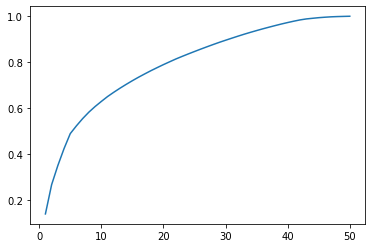

In [15]:
#components vs percentage graph for 50 componenets
components = [i for i in range(1,51)]
sns.lineplot(x=components, y=percent)

In [16]:
components = [i for i in range(10,130)]
percent = []
for i in range(10,130):
    svd = TruncatedSVD(n_components=i, n_iter=7, random_state=42)
    svd.fit(train_vec)
    percentage = 0
    total = np.sum(svd.explained_variance_ratio_)
    var_sorted = svd.explained_variance_ratio_.tolist()
    var_sorted.sort(reverse = True)
    count = 0
    for j in var_sorted:
        count+=1
        percentage += j
        if percentage/total>=0.9:
            percent.append(count)
            break
percent

[8,
 9,
 9,
 10,
 11,
 11,
 12,
 13,
 14,
 14,
 15,
 16,
 16,
 17,
 18,
 18,
 19,
 20,
 20,
 21,
 22,
 23,
 23,
 24,
 25,
 25,
 26,
 27,
 27,
 28,
 28,
 29,
 29,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31]

<AxesSubplot:>

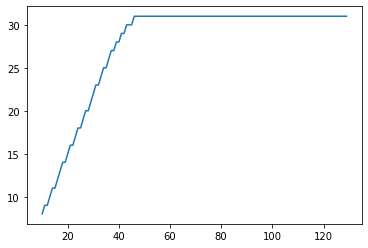

In [17]:
#components vs 90% confidence point
sns.lineplot(x=components, y=percent)

In [19]:
components = [i for i in range(1,50)]
percent = []
for i in range(1,50):
    svd = TruncatedSVD(n_components=50, n_iter=i, random_state=42)
    svd.fit(train_vec)
    percentage = 0
    total = np.sum(svd.explained_variance_ratio_)
    var_sorted = svd.explained_variance_ratio_.tolist()
    var_sorted.sort(reverse = True)
    count = 0
    for j in var_sorted:
        count+=1
        percentage += j
        if percentage/total>=0.9:
            percent.append(count)
            break
percent

[31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31]

<AxesSubplot:>

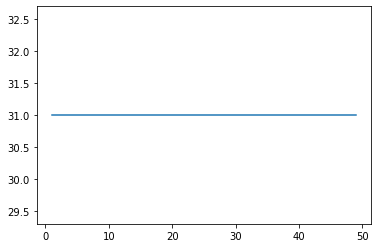

In [20]:
#iterations vs 90% confidence point
sns.lineplot(x=components, y=percent)

## Bag of Words

In [18]:
vectorizer = CountVectorizer(analyzer='char')
train_vec = vectorizer.fit_transform(train['url'])
train_vec.shape

(148829, 133)

In [19]:
# valid_vec = vectorizer.transform(valid['url'])
# valid_vec.shape

In [20]:
test_vec = vectorizer.transform(test['url'])
test_vec.shape

(16537, 133)

In [21]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
svd.fit(train_vec)

TruncatedSVD(n_components=50, n_iter=7, random_state=42)

In [22]:
svd.explained_variance_ratio_

array([2.54659353e-01, 2.66766497e-01, 9.15494907e-02, 5.30655064e-02,
       4.59676350e-02, 3.08112186e-02, 2.48299372e-02, 2.06836339e-02,
       1.71093912e-02, 1.58041450e-02, 1.41054062e-02, 1.31774279e-02,
       1.11692655e-02, 1.01968240e-02, 9.71439419e-03, 9.57617937e-03,
       8.99484992e-03, 8.58493191e-03, 8.11904230e-03, 7.24803654e-03,
       6.31922778e-03, 6.05400886e-03, 5.73369836e-03, 5.55440440e-03,
       4.80916225e-03, 4.30265292e-03, 4.26398190e-03, 4.03041411e-03,
       3.76239466e-03, 3.41451858e-03, 3.27862289e-03, 3.05039975e-03,
       2.84666753e-03, 2.59198460e-03, 2.17882969e-03, 2.05441771e-03,
       1.84801904e-03, 1.78163080e-03, 1.68823045e-03, 1.52252073e-03,
       1.44099892e-03, 1.38788103e-03, 1.23544656e-03, 8.79654932e-04,
       5.40315621e-04, 4.58448627e-04, 2.11326294e-04, 1.45243054e-04,
       1.26145625e-04, 6.42975046e-05])

In [23]:
total = np.sum(svd.explained_variance_ratio_)
var_sorted = svd.explained_variance_ratio_.tolist()
var_sorted.sort(reverse = True)
percentage = 0
percent = []
count = 0
for i in var_sorted:
    count+= 1
    percentage += i
    percent.append(percentage/total)
    if percentage >= .90:
        print(count)

18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


<AxesSubplot:>

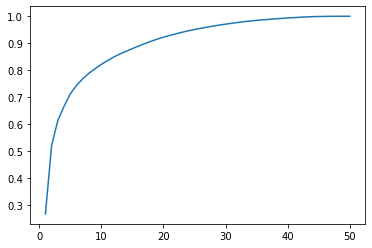

In [24]:
#components vs percentage graph for 50 componenets
components = [i for i in range(1,51)]
sns.lineplot(x=components, y=percent)

In [25]:
components = [i for i in range(10,130)]
percent = []
for i in range(10,130):
    svd = TruncatedSVD(n_components=i, n_iter=7, random_state=42)
    svd.fit(train_vec)
    percentage = 0
    total = np.sum(svd.explained_variance_ratio_)
    var_sorted = svd.explained_variance_ratio_.tolist()
    var_sorted.sort(reverse = True)
    count = 0
    for j in var_sorted:
        count+=1
        percentage += j
        if percentage/total>=0.9:
            percent.append(count)
            break
percent

[6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18]

<AxesSubplot:>

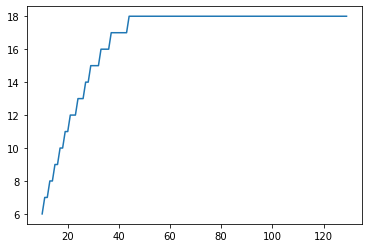

In [26]:
#components vs 90% confidence point
sns.lineplot(x=components, y=percent)

In [30]:
components = [i for i in range(1,50)]
percent = []
for i in range(1,50):
    svd = TruncatedSVD(n_components=50, n_iter=i, random_state=42)
    svd.fit(train_vec)
    percentage = 0
    total = np.sum(svd.explained_variance_ratio_)
    var_sorted = svd.explained_variance_ratio_.tolist()
    var_sorted.sort(reverse = True)
    count = 0
    for j in var_sorted:
        count+=1
        percentage += j
        if percentage/total>=0.9:
            percent.append(count)
            break
percent

[18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18]

<AxesSubplot:>

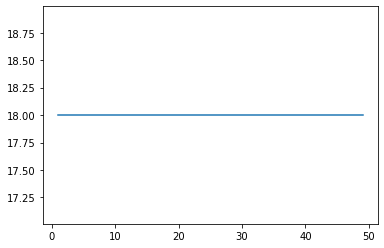

In [31]:
#iterations vs 90% confidence point
sns.lineplot(x=components, y=percent)